# Libraries

In [3]:
import pandas as pd
from tqdm import tqdm
from sklearn.cluster import KMeans
from collections import defaultdict
from collections import Counter
import math
from ast import literal_eval
import numpy as np
import matplotlib.pyplot as plt

# Cleaning the Data

In [ ]:
path = '/Users/domenicomattiacinque/Documents/Università/ADM2020/HW4/archive'
dataset = pd.read_csv(path + '/Reviews.csv', nrows = 10000)

In [ ]:
dataset.head()

In [ ]:
dataset.isnull().sum()

In [ ]:
dataset['Summary'].fillna('', inplace=True)

In [ ]:
dataset['Text'] = dataset['Summary'] + ' ' + dataset['Text'] 

In [ ]:
dataset.drop(['ProfileName','HelpfulnessNumerator',
              'HelpfulnessDenominator','Time','Summary'],axis=1, inplace=True)

In [ ]:
dataset.head()

In [ ]:
dataset['ProductId'].nunique()

In [ ]:
df = dataset.groupby('ProductId')['Text'].apply(lambda x: ' '.join(x)).reset_index()

In [ ]:
df.head()

# Text Mining
We want to cluster the products using the reviews that we can find in the column 'Text' of our dataset. In order to do this we need to represent the reviews as TF-IDF score used in the previous homework.

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

In [ ]:
#Realizing the cleaned token 
def clean_text(text):
    words = word_tokenize(text)
    tagged = nltk.pos_tag(words)
    
    good_words = []
    for word,tag in tagged:
        if tag == 'NN' or tag == 'NNS' or tag =='NNPS' or tag == 'NNP':
            if word.lower() not in stop_words and word.isalpha() and word.lower() not in string.punctuation:
                good_words.append(ps.stem(word).lower())
    return good_words

In [ ]:
#test
print(df['Text'][0])
print(clean_text(df['Text'][0]))

In [128]:
flat_list = [item for items in df.Text_Words for item in items]

In [129]:
len(flat_list)

618301

In [111]:
counts = pd.Series(flat_list).value_counts().sort_values(ascending = False)

In [182]:
counts.head(50)

br         10295
coffe       4442
flavor      3788
product     3356
tast        3029
food        2310
tea         1972
cup         1688
time        1649
price       1596
chip        1585
bag         1352
dog         1305
amazon      1275
great       1204
chocol      1153
brand       1137
water       1133
sugar       1109
store       1042
box          995
mix          972
year         901
way          885
day          876
juic         854
thing        818
drink        816
review       811
order        801
cat          776
milk         755
bit          751
pack         747
lot          744
ingredi      725
packag       722
treat        702
one          688
snack        667
qualiti      662
someth       650
stuff        643
calori       608
cooki        568
bean         561
orang        554
problem      537
soda         521
size         519
dtype: int64

In [ ]:
#Applying the clean_text function to each element of the column 'Text'
df['Text_Words'] = df.Text.apply(lambda x: clean_text(x))

In [ ]:
df.head(5)

In [2]:
df = pd.read_csv('new_reviews.csv')

In [3]:
df.Text_Words = df.Text_Words.apply(literal_eval)

In [4]:
def vocabulary(df):
    words = defaultdict(list)
    for i,el in enumerate(df['Text_Words']):
        for w in el:
            words[w].append(i)
    return words
voc = vocabulary(df)

In [5]:
#counting the ripetition of each token for each plot
df["Text_Ripetition"] = df["Text_Words"].apply(lambda x : Counter(x))

In [6]:
df.head()

,ProductId,Text,Text_Words,Text_Ripetition
0,0006641040,Read it once. Read it twice. Reading Chicken S...,"[chicken, soup, rice, day, person, chicken, so...","{'chicken': 19, 'soup': 35, 'rice': 21, 'day':..."
1,141278509X,The best drink mix This product by Archer Farm...,"[drink, mix, product, archer, farm, drink, mix...","{'drink': 2, 'mix': 2, 'product': 1, 'archer':..."
2,2734888454,made in china My dogs loves this chicken but i...,"[dog, chicken, product, china, chicken, produc...","{'dog': 3, 'chicken': 2, 'product': 3, 'china'..."
3,2841233731,Great recipe book for my babycook This book is...,"[great, book, babycook, book, ingredi, store, ...","{'great': 1, 'book': 3, 'babycook': 1, 'ingred..."
4,7310172001,very good This product is a very health snack ...,"[product, health, snack, pup, beef, liver, tri...","{'product': 78, 'health': 1, 'snack': 11, 'pup..."


In [7]:
def tf_i(text):
    tot_token = 0
    for k, v in text.items():
        tot_token += v #numbers of total tokens in the plot
    tf = {}
    for token, rip in text.items():#the values in this dictionary are the ripetition of that specific token
        tf[token] = round(rip / tot_token,4)
    return tf 

In [8]:
tf = []
for i in range(len(df['Text_Ripetition'])):
    tf.append(tf_i(df["Text_Ripetition"][i])) #applying the previous function to each plot
df["Tf"] = tf #adding the column tf to the dataset

In [9]:
df.head()

,ProductId,Text,Text_Words,Text_Ripetition,Tf
0,0006641040,Read it once. Read it twice. Reading Chicken S...,"[chicken, soup, rice, day, person, chicken, so...","{'chicken': 19, 'soup': 35, 'rice': 21, 'day':...","{'chicken': 0.0239, 'soup': 0.0441, 'rice': 0...."
1,141278509X,The best drink mix This product by Archer Farm...,"[drink, mix, product, archer, farm, drink, mix...","{'drink': 2, 'mix': 2, 'product': 1, 'archer':...","{'drink': 0.08, 'mix': 0.08, 'product': 0.04, ..."
2,2734888454,made in china My dogs loves this chicken but i...,"[dog, chicken, product, china, chicken, produc...","{'dog': 3, 'chicken': 2, 'product': 3, 'china'...","{'dog': 0.1579, 'chicken': 0.1053, 'product': ..."
3,2841233731,Great recipe book for my babycook This book is...,"[great, book, babycook, book, ingredi, store, ...","{'great': 1, 'book': 3, 'babycook': 1, 'ingred...","{'great': 0.0667, 'book': 0.2, 'babycook': 0.0..."
4,7310172001,very good This product is a very health snack ...,"[product, health, snack, pup, beef, liver, tri...","{'product': 78, 'health': 1, 'snack': 11, 'pup...","{'product': 0.024, 'health': 0.0003, 'snack': ..."


In [10]:
idf = {}
for el in df['Text_Words']:   
    for token in el:
         idf.update({ token : round(math.log(len(df)/ len(voc[token]),3))})  #applying the formula for each token 

In [11]:
# Creating a vocabulary that as keys as the word and as values its index
def vocabulary_words(df):
    words = dict()
    i = 0
    for el in tqdm(df['Text_Words']):
        for w in el:
            if w not in words.keys():
                words[w] = i
                i += 1
    return words

In [12]:
voc_words = vocabulary_words(df)

100%|██████████| 74258/74258 [00:01<00:00, 60609.06it/s]


In [13]:
def score(dictionary):
    v = [0]*(len(voc_words))
    for word in dictionary.keys():
        v[voc_words[word]] = dictionary[word]*idf[word]
    return v

In [14]:
from scipy.sparse import lil_matrix

matrix = lil_matrix((len(df), len(voc_words)), dtype=np.float)
for i in tqdm(range(len(df["Tf"]))):
    matrix[i] = np.array(score(df["Tf"][i]))

100%|██████████| 74258/74258 [07:23<00:00, 167.52it/s]


In [15]:
from scipy.sparse import csr_matrix

matrix = csr_matrix(matrix)

## Dimensionality Reduction

In [16]:
from sklearn.decomposition import TruncatedSVD

In [17]:
matrix.shape

(74258, 62787)

In [18]:
svd = TruncatedSVD(n_components=2000, random_state=42)
svd.fit(matrix)

TruncatedSVD(n_components=2000, random_state=42)

In [19]:
print(svd.explained_variance_ratio_.sum())

0.6081094855890448


In [20]:
svd_matrix = svd.transform(matrix)

In [21]:
svd_matrix.shape

(74258, 2000)

## Implement KMeans from scratch
### Step 0 
Elbow method to choose the number of clusters k 
### Step 1
Random inizialization of the k representative points
### Step 2
Find the cluster $C_i$ defined as $\{x : \parallel x-\mu_i\parallel \leq \parallel x-\mu_j\parallel \forall j\ne i\}  \forall i=1..k$
### Step 3 
Find $\mu_i$ which is defined as $\frac{1}{|C_i|} \sum_{x\in C_i} x \;\; \forall i=1..k$
<hr>
Repeat step 2 and step 3 until <b>convergence</b>.

### Convergence
We stop when the clusters don't change from the previous iteration.

In [22]:
import random

In [66]:
def euclidian_dist(x,y):
    return np.linalg.norm(x-y)

In [67]:
def KMeans(k, matrix):
    # 1. Choosing k random representatives
    representatives_idx = random.sample(range(1, len(matrix)), k)  #Chosing the initial representatives
    new_representatives =  []
    for i in range(k):
        new_representatives.append(matrix[representatives_idx[i]])
    representatives = []
    
    run = True
    
    while run:
        representatives = new_representatives
        
        # Creating the clusters
        clusters = {i: [] for i in range(k)}  # Empty dictionary for each cluster with list as value 
        i_clusters = {i: [] for i in range(k)}
        
        # 2. Computing distances and choosing 
        for ind, point in enumerate(matrix):
            dist_xmu = []      # Distance between the point and the representatives for each representative
            for i in range(k): 
                dist_xmu.append(euclidian_dist(representatives[i], point))
            nearest_representative = dist_xmu.index(min(dist_xmu))
            clusters[nearest_representative].append(point) #Put the point in the cluster with the minimum distance
            i_clusters[nearest_representative].append(ind)
            
        # 3. Selecting new representatives
        new_representatives = []
        for i in range(k):
            run = False
            new_val = np.sum(clusters[i],axis=0)/len(clusters[i])
            new_representatives.append(new_val)
        
        for i in range(len(representatives)):
            if np.any(representatives[i] != new_representatives[i]):
                run = True
                
    return clusters, new_representatives, i_clusters

In [64]:
clusters, new_representatives, i_clusters = KMeans(10, svd_matrix)

In [52]:
np.all(np.array([1, 2, 3]) == np.array([1, 4, 3]))

False

In [ ]:
list(df.iloc[i_clusters[5]].Text)[50]

## Elbow Method 

### Our KMeans

In [68]:
def inertia(matrix, centroid, k):
    sq_norms = [] #consideranting the norms of xi - muj where i is fixed and j is in range(k)
    sum_ = 0
    for i in range(len(matrix)):
        sq_norms = []
        for j in range(k):
            sq_norm = euclidian_dist(matrix[i],centroid[j])**2 # squared norm between xi and muj
            sq_norms.append(sq_norm) #saving the result in the j-th position of sq_norms array
        min_sq_norm = min(sq_norms) #considering the minimum norm
        sum_ += min_sq_norm
    return sum_ #return inertia

In [69]:
elbow = []
for k in tqdm(range(1, 10)):
    clusters, representatives, i_clusters = KMeans(k, svd_matrix)
    inertia_ = inertia(svd_matrix, representatives, k) 
    elbow.append(inertia_)

100%|██████████| 9/9 [11:44<00:00, 78.25s/it] 


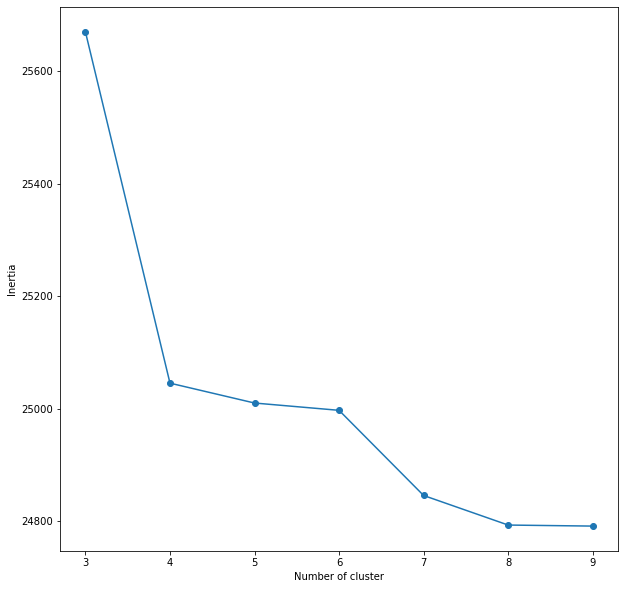

In [77]:
plt.figure(figsize = (10, 10))
plt.plot(range(3,10), elbow[2:])
plt.scatter(range(3,10), elbow[2:])
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

In [75]:
from kneed import KneeLocator
kn = KneeLocator(range(3,10), elbow[2:], curve='convex', direction='decreasing')
print(kn.knee)

4


### KMeans ++

In [5]:
from sklearn.cluster import KMeans

In [ ]:
elbow = {}
for k in tqdm(range(3,10)):
    elbow_model = KMeans (n_clusters = k, init = 'k-means++')
    elbow_model.fit_predict(svd_matrix)
    elbow[k] = elbow_model.inertia_

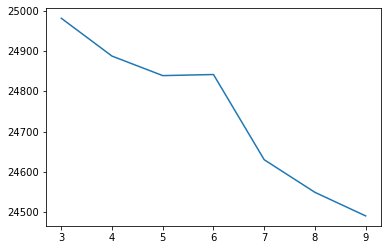

In [69]:
plt.plot(list(elbow.keys()), list(elbow.values()))

## Cluster Analysis

In [164]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=0, init='k-means++').fit(matrix)

In [165]:
labels = kmeans.labels_

In [166]:
df['cluster'] = labels

In [171]:
df['Text_Words'] = df.Text_Words.apply(lambda x: ' '.join(x)) 

In [172]:
df.head()

,ProductId,Text,Text_Words,Text_Ripetition,Tf,cluster
0,0006641040,Read it once. Read it twice. Reading Chicken S...,chicken soup rice day person chicken soup word...,"{'chicken': 19, 'soup': 35, 'rice': 21, 'day':...","{'chicken': 0.0239, 'soup': 0.0441, 'rice': 0....",6
1,141278509X,The best drink mix This product by Archer Farm...,drink mix product archer farm drink mix packet...,"{'drink': 2, 'mix': 2, 'product': 1, 'archer':...","{'drink': 0.08, 'mix': 0.08, 'product': 0.04, ...",1
2,2734888454,made in china My dogs loves this chicken but i...,dog chicken product china chicken product usa ...,"{'dog': 3, 'chicken': 2, 'product': 3, 'china'...","{'dog': 0.1579, 'chicken': 0.1053, 'product': ...",1
3,2841233731,Great recipe book for my babycook This book is...,great book babycook book ingredi store recip b...,"{'great': 1, 'book': 3, 'babycook': 1, 'ingred...","{'great': 0.0667, 'book': 0.2, 'babycook': 0.0...",1
4,7310172001,very good This product is a very health snack ...,product health snack pup beef liver trick trea...,"{'product': 78, 'health': 1, 'snack': 11, 'pup...","{'product': 0.024, 'health': 0.0003, 'snack': ...",6


In [174]:
df_cluster = df.groupby('cluster')['Text_Words'].apply(lambda x: ' '.join(x)).reset_index()

In [175]:
df_cluster

,cluster,Text_Words
0,0,salmon trout trout salmon trout fish mistak sp...
1,1,drink mix product archer farm drink mix packet...
2,2,thirti buck product br http br br victor trap ...
3,3,tea digest product dosag batch other product g...
4,4,thing wine saver way bottl wine day glass dinn...
5,5,store chili powder fast excel chili season tac...
6,6,chicken soup rice day person chicken soup word...
7,7,yum yum br waxi br fruiti flavor eater food fl...


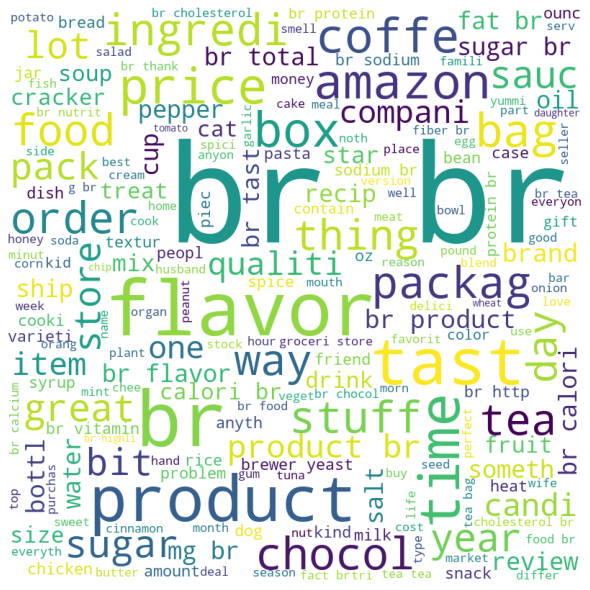

In [183]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(df_cluster.iloc[7].Text_Words) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [190]:
df_cluster2 = df.groupby('cluster')['ProductId'].count().reset_index()

In [191]:
df_cluster2

,cluster,ProductId
0,0,6
1,1,40252
2,2,7793
3,3,4627
4,4,246
5,5,239
6,6,19018
7,7,2077


In [ ]:
df_cluster